## DESCRIPTION OF FEATURES AND DATASET
The game and arrest data were acquired from public records requests submitted by the Washington Post to the local police departments that manage security at the 31 NFL stadiums. 

Twenty-nine of the 31 police departments provided data (i.e. Cleveland and New Orleans did respond to the requests). However, five of the twenty-nine responders delivered partial data. 

The Buffalo police department omitted arrest numbers for several regular season games. 

St. Louis only gave year-by-year arrest data. 

Detroit, Minneapolis, and Atlanta exclusively provided arrest data inside the stadium (i.e. parking lot arrests were excluded). 

The NFL stadium arrest data is uploaded into a pandas dataframe. The seven NFL teams that provided missing or only partial arrest data were omitted.

*NOTE: There are 32 total NFL teams, but 31 NFL stadiums (both New York teams play in MetLife Stadium.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
df = pd.read_csv('arrests.csv')
df = df.dropna(subset = ['arrests'])
df = df.reset_index(drop = True)
df.head(265)

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,NaN,5.0,n
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,NaN,6.0,n
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,NaN,9.0,n
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,OT,6.0,y
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,OT,3.0,n
5,2011,14,Sunday,2:05:00 PM,Arizona,San Francisco,21,19,NaN,4.0,y
6,2011,15,Sunday,2:15:00 PM,Arizona,Cleveland,20,17,OT,1.0,n
7,2011,17,Sunday,2:15:00 PM,Arizona,Seattle,23,20,OT,4.0,y
8,2012,1,Sunday,1:25:00 PM,Arizona,Seattle,20,16,NaN,0.0,y
9,2012,3,Sunday,1:05:00 PM,Arizona,Philadelphia,27,6,NaN,12.0,n


In [2]:
df.tail(25)

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
941,2012,17,Sunday,8:20:00 PM,Washington,Dallas,28,18,NaN,7.0,y
942,2013,1,Monday,7:10:00 PM,Washington,Philadelphia,27,33,NaN,7.0,y
943,2013,3,Sunday,1:00:00 PM,Washington,Detroit,20,27,NaN,2.0,n
944,2013,7,Sunday,1:00:00 PM,Washington,Chicago,45,41,NaN,1.0,n
945,2013,9,Sunday,1:00:00 PM,Washington,San Diego,30,24,OT,3.0,n
946,2013,12,Monday,8:40:00 PM,Washington,San Francisco,6,27,NaN,4.0,n
947,2013,13,Sunday,8:30:00 PM,Washington,New York Giants,17,24,NaN,2.0,y
948,2013,14,Sunday,1:00:00 PM,Washington,Kansas City,10,45,NaN,0.0,n
949,2013,16,Sunday,1:00:00 PM,Washington,Dallas,23,24,NaN,7.0,y
950,2014,2,Sunday,1:00:00 PM,Washington,Jacksonville,41,10,NaN,2.0,n


There are ten features (four quantitative and six categorical)in this dataset:

Quantitative Features:

1. Week of NFL Season (17 weeks in a regular season)
2. Local Game Time
3. Home Team Score
4. Away Team Score

Categorical Features:

1. NFL Season (2011-2015)
2. Day of Week (Sunday, Monday, Thursday, Saturday)
3. Home Team
4. Away Team
5. OT Flag (i.e. 'OT' = game concluded in overtime, otherwise the game concluded at the end of regulation)
6. Division Game Flag (i.e. 'y' = both teams in game were in same division, otherwise 'n')

The output variable is the number of arrests reported for each regular season game. 

In total, the twenty-five teams contributed game and arrest data for 966 total regular season games.

In [3]:
df.shape

(966, 11)

## MARGINAL DISTRIBUTION OF STADIUM ARRESTS
Before conducting any analyses to extract patterns from the data, the distribution of the number of stadium arrests was studied to characterize its shape, center, and spread. 

In [4]:
arrests = df['arrests']
arrests.head(25)

0      5.0
1      6.0
2      9.0
3      6.0
4      3.0
5      4.0
6      1.0
7      4.0
8      0.0
9     12.0
10     4.0
11     1.0
12     3.0
13     7.0
14     3.0
15     7.0
16     7.0
17     3.0
18     7.0
19     2.0
20     3.0
21     2.0
22     4.0
23     7.0
24     4.0
Name: arrests, dtype: float64

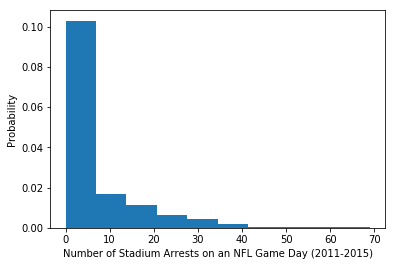

In [5]:
arrests = np.array(arrests)
plt.figure()
plt.hist(arrests, density = True)
plt.xlabel('Number of Stadium Arrests on an NFL Game Day (2011-2015)')
plt.ylabel('Probability')
plt.show()

As evidenced above, the distribution of stadium arrests is heavily skewed to the right, which indicates that very few arrests were reported on most regular season game days. This also suggests that the mean of the distribution is greater than the median. 

The summary statistics (e.g. mean, median, mode, min, max) are listed below:

In [6]:
print("Average Number of Arrests: " + str(arrests.mean()))
print("Median Number of Arrests: " + str(int(np.median(arrests))))
print("Mode of Distribution: " + str(int(stat.mode(arrests)[0])))
print("Minimum Number of Arrests: " + str(int(arrests.min())))
print("Maximum Number of Arrests: " + str(int(arrests.max())))

Average Number of Arrests: 6.566252587991719
Median Number of Arrests: 3
Mode of Distribution: 0
Minimum Number of Arrests: 0
Maximum Number of Arrests: 69


As shown, the mean number of arrests per game day (6.57) is greater than the median number of arrests per game day 
(3 arrests per game day). 

The mode of the distribution is 0 arrests per game day, which was reported for 215 regular season games from the dataset. Thus, there are often no arrests reported at NFL stadiums regular season game days (i.e. observing arrests at an NFL stadium are generally rare events). 

While zero was the lowest number of arrests observed at a stadium, one stadium reported 69 arrests at one of its games. The game was a Week 10 regular season game held at Qualcomm Stadium between the San Diego Chargers and the Oakland Raiders that was played on Thursday evening, November 10, 2011. This observation is fascinating when considering the generally great climate and temperament of the citizens living in San Diego.

## CONDITIONAL DISTRIBUTIONS OF STADIUM ARRESTS

After examining the marginal distribution of stadium arrests over all twenty-five of the reported NFL stadiums, the conditional distribution of stadium arrests statistics for each reported stadium were examined in further detail. 

First, the total number of arrests reported for each NFL stadium during the 2011-2015 regular seasons were computed.

In [7]:
stadiumArrests = df[['home_team', 'arrests']]
stadiumArrests.head(25)

,home_team,arrests
0,Arizona,5.0
1,Arizona,6.0
2,Arizona,9.0
3,Arizona,6.0
4,Arizona,3.0
5,Arizona,4.0
6,Arizona,1.0
7,Arizona,4.0
8,Arizona,0.0
9,Arizona,12.0


In [8]:
totalarrestsByStadium = stadiumArrests.groupby(['home_team']).sum()
totalarrestsByStadium.head(32)

,arrests
home_team,
Arizona,166.0
Baltimore,46.0
Carolina,55.0
Chicago,26.0
Cincinnati,57.0
Dallas,169.0
Denver,105.0
Green Bay,288.0
Houston,40.0


In [9]:
# CREATE BAR CHAT LABELS

def only_upper(s):
    """Returns uppercase letters of string"""
    upper_case = ""
    for letter in s:
        if letter.isupper():
            upper_case += letter
    return upper_case

truncatedStadiums = []
for index in totalarrestsByStadium.index:
    if " " in index:
        index = only_upper(index)
    else:
        index = index[:3].upper()
    truncatedStadiums.append(index)
totalarrestsByStadium.index = truncatedStadiums
totalarrestsByStadium.index

Index(['ARI', 'BAL', 'CAR', 'CHI', 'CIN', 'DAL', 'DEN', 'GB', 'HOU', 'IND',
       'JAC', 'KC', 'MIA', 'NE', 'NYG', 'NYJ', 'OAK', 'PHI', 'PIT', 'SD', 'SF',
       'SEA', 'TB', 'TEN', 'WAS'],
      dtype='object')

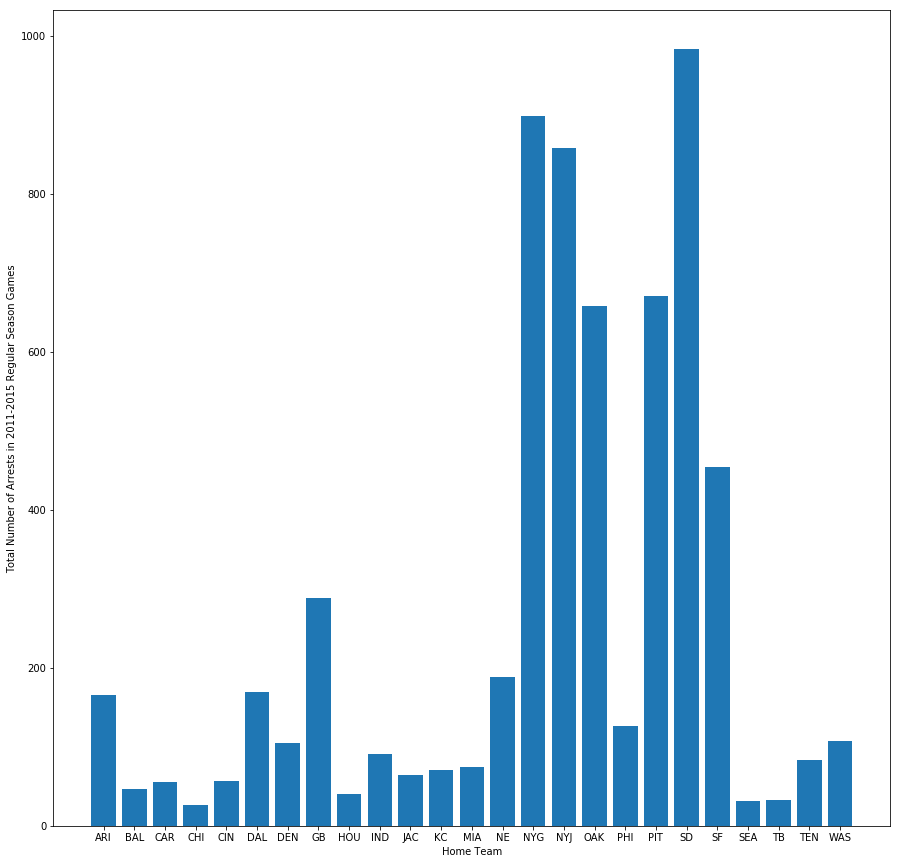

In [10]:
plt.figure(figsize= (15, 15))
plt.bar(totalarrestsByStadium.index, totalarrestsByStadium.arrests)
plt.xlabel('Home Team')
plt.ylabel('Total Number of Arrests in 2011-2015 Regular Season Games')
plt.show()

San Diego not only reported the largest number of stadium arrests on a single game day, but also the highest total number of stadium arrests (983) during the 2011-2015 regular seasons. 

Both New York teams reported the second and third-highest arrest totals (899 and 858, respectively). 

Pittsburgh and Oakland, two cities with renowned football franchises and fanbases, also reported the fourth and fifth-highest arrest totals (670 and 658, respectively). 

San Francisco also reported considerably higher numbers of arrests than other stadiums (454).

After examining the arrest totals for each NFL stadium, the median, single day numbers of stadium arrests were computed for each reported stadium.

In [11]:
medianarrestsByStadium = stadiumArrests.groupby(['home_team']).median()
medianarrestsByStadium.head(32)

,arrests
home_team,
Arizona,4.0
Baltimore,0.0
Carolina,1.0
Chicago,1.0
Cincinnati,1.0
Dallas,3.0
Denver,2.0
Green Bay,6.0
Houston,1.0


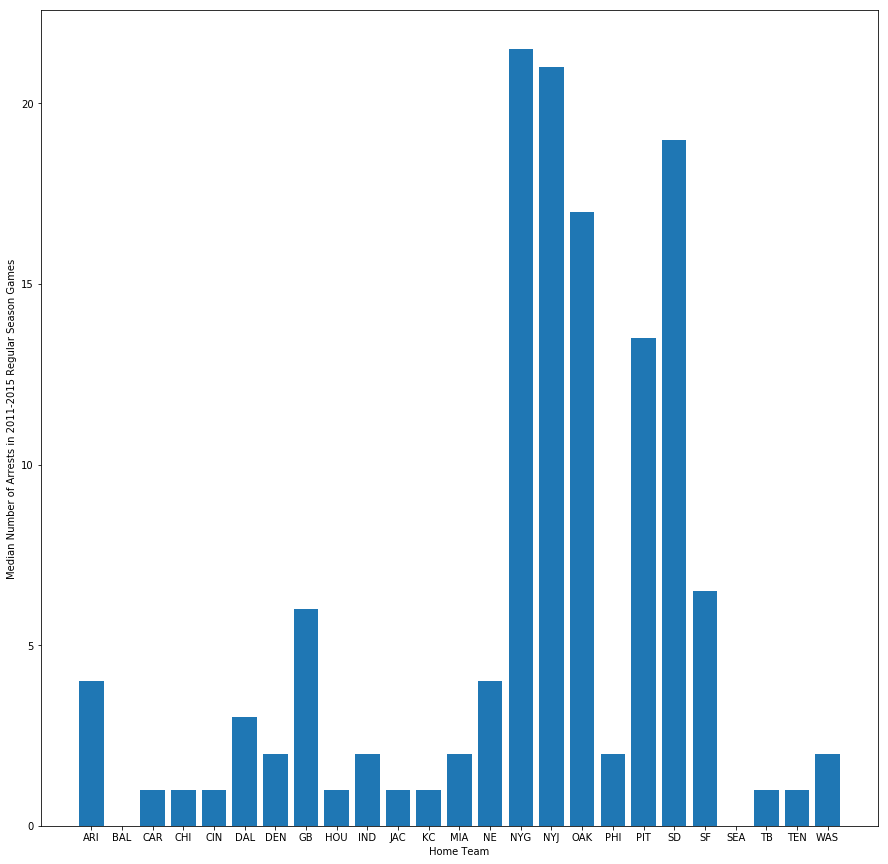

In [12]:
medianarrestsByStadium.index = truncatedStadiums
plt.figure(figsize= (15, 15))
plt.bar(medianarrestsByStadium.index, medianarrestsByStadium.arrests)
plt.xlabel('Home Team')
plt.ylabel('Median Number of Arrests in 2011-2015 Regular Season Games')
plt.show()

In contrast, San Diego did not report the highest median number of arrests for a single game day. Instead, both New York teams reported the largest median numbers of arrests on single game days (21.5 and 21, respectively), while San Diego had the third-highest median number of stadium arrests (19). 

Oakland and Pittsburgh also reported the fourth and fifth-highest median numbers of arrests (17 and 13.5, respectively). 

Interestingly, San Francisco reported the sixth highest number of total arrests; however, its median number of single day stadium arrests (6.5) is comparable to the 19 remaining teams.

The deviations between the median and total arrest numbers observed in San Diego and San Francisco suggest that the conditional distributions of stadium arrests for both teams are skewed. 

Thus, box-and-whisker plots of the single day game arrest numbers for each NFL stadium were generated to confirm these observations. 

The lengths of the whiskers for each plot were determined to be 1.5 times the interquartile range 
(i.e. 1.5(Q3 - Q1) = 1.5(IQR)).

Thus, an observation was deemed an outlier if the reported arrest number was one "whisker length" outside of the box spanned between the first quartile (Q1) and third quartile (Q3) (i.e. less than Q1 - 1.5(IQR) or greater than Q3 + 1.5(IQR)) for each stadium).

In [13]:
stadiumArrests = df[['home_team', 'arrests']]
stadiums = stadiumArrests['home_team'].unique()
stadiums = [stadium for stadium in stadiums if stadium != 'nan']

In [14]:
# Create Dictionary of Arrests by Stadium

groupedArrests = {}
for stadium in stadiums:
    stadium_values = []
    
    for row in range(stadiumArrests['home_team'].size):
        stadium_incidence = stadiumArrests['home_team'][row]
        
        if stadium == stadium_incidence:
            stadium_values.append(stadiumArrests['arrests'][row])
            
    groupedArrests[stadium] = stadium_values


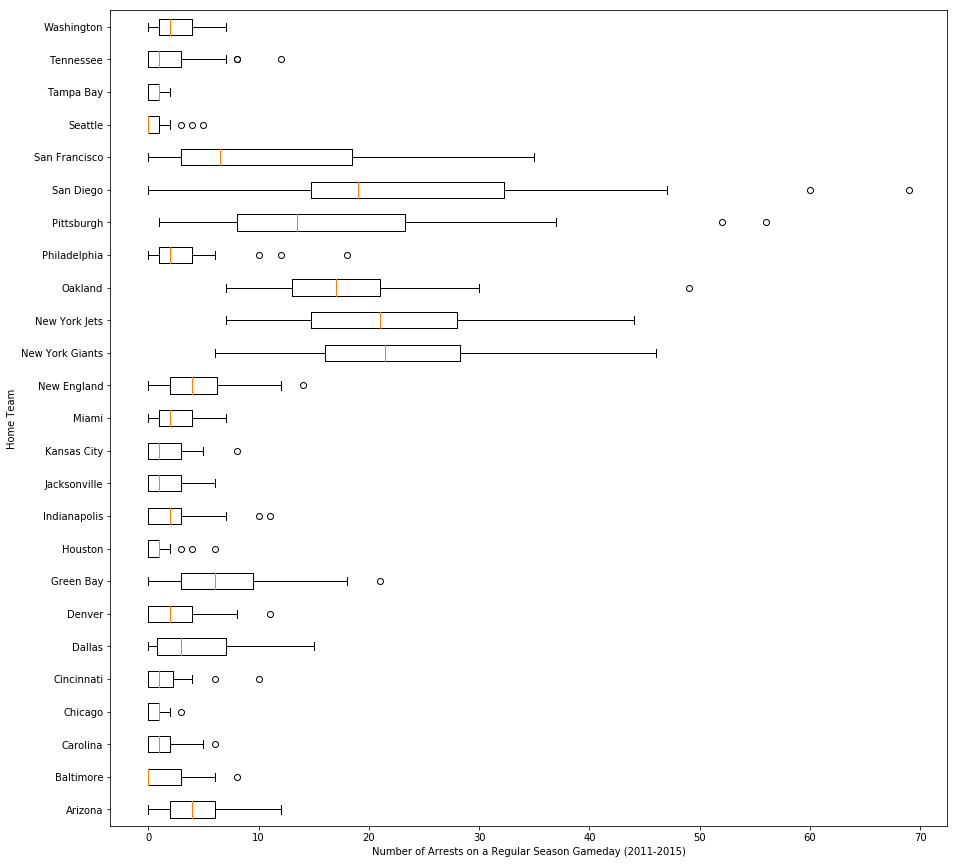

In [15]:
boxplot_data = groupedArrests.values()
boxplot_labels = groupedArrests.keys()
plt.figure(figsize= (15, 15))
plt.boxplot(boxplot_data, vert = False, labels = boxplot_labels)
plt.xlabel('Number of Arrests on a Regular Season Gameday (2011-2015)')
plt.ylabel('Home Team')
plt.show()


The distribution of arrests for San Diego is slightly skewed to the right with two abnormally large outliers (60 and 69 arrests). 

On the other hand, both New York have generally symmetric distributions of stadium arrests with a high median number of arrests. Thus, these results confirm that San Diego reported the highest total number of arrests, yet both New York teams had the highest median number of single day stadium arrests. 

Analogously, Pittsburgh reported slightly higher arrest totals than Oakland over the five regular seasons, but Oakland reported a higher median number of a single day arrests than Pittsburgh. The conditional distribution of arrests for Pittsburgh is slightly skewed to the right with two high outliers (52 and 56 arrests) while the conditional distribution of arresst for Oakland is symmetric with a lower median number of arrests and only a single outlier (49 arrests). 

The box-and-whisker plot for the single day arrests in San Francisco contains no outliers, but the distribution is still heavily skewed to the right. It is likely that a few regular season games in San Francisco reported very large numbers of arrests that skewed the total (and the mean) number of reported arrests to be misleadingly higher than the median number of arrests.

Generally speaking, the median numbers of single day stadium arrests for most NFL teams’ home games fall between 0 to 6 arrests per day. However, the five aforementioned outlier teams (San Diego, New York Giants, New York Jets, Oakland Raiders, Pittsburgh Steelers) exhibited significantly higher median arrest numbers than the remaining teams.


## GROUPING SIMILAR NFL TEAMS BY REPORTED ARRESTS AND HOME PERFORMANCE
After understanding the trends in reported arrests for each NFL stadium, the next task was to implement a k-means clustering algorithm on the data to identify clusters of teams that reported similar arrest frequencies and team performances. 

Each team's median performance was measured using its median margin of defeat (i.e. the result of the median home team score subtracted from the median away team score). This metric was selected because it quantifies each NFL team’s typical performance when playing its home stadium (i.e. a high median margin of defeat suggests that a team lost most of its home games, and vice versa). 

The KMeans function from the Sci-kit Learn Cluster library was used to conduct k-means clustering on the data. First, the feature pairs (median number of arrests, median margin of defeat) for each NFL team were standardized by centering each feature to its mean value and scaled down to unit variance. 

A convergence tolerance of 0.0001 was selected, and a maximum of 300 iterations was enforced for each epoch of the clustering (i.e. convergence is reached when the change in the updated centroid coordinates is less than 0.0001 or when 300 iterations of the assign-update steps of k-means are completed).

A total of ten k-means clustering epochs were conducted with different initial guesses of the cluster center coordinates. After ten simulations were completed, the centroid coordinates that yielded the lowest inertia (i.e. the distance between each NFL team's feature coordinate and its assigned cluster centroid coordinate), were selected.

In [16]:
# Generate training set or k-means

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 

trainingSet = df[['home_team', 'home_score', 'away_score', 'arrests']]
marginDefeat = trainingSet['away_score'] - trainingSet['home_score']
trainingSet.insert(loc = 3, column = 'marginDefeat', value = marginDefeat)

X = trainingSet[['home_team', 'marginDefeat', 'arrests']]
X = X.groupby(['home_team']).median()
X.head(40)

,marginDefeat,arrests
home_team,,
Arizona,-3.5,4.0
Baltimore,-3.0,0.0
Carolina,-4.5,1.0
Chicago,-1.0,1.0
Cincinnati,-6.5,1.0
Dallas,1.0,3.0
Denver,-7.0,2.0
Green Bay,-9.5,6.0
Houston,-6.0,1.0


In [17]:
# Create and fit k-means clustering model to training set
scaler = StandardScaler()
scaledFeatures = scaler.fit_transform(X)

model = KMeans(n_clusters = 8)
model = model.fit(scaledFeatures)
print(model.labels_)

[3 3 3 3 6 1 6 0 6 3 7 3 3 0 2 2 4 1 5 2 6 0 1 1 1]


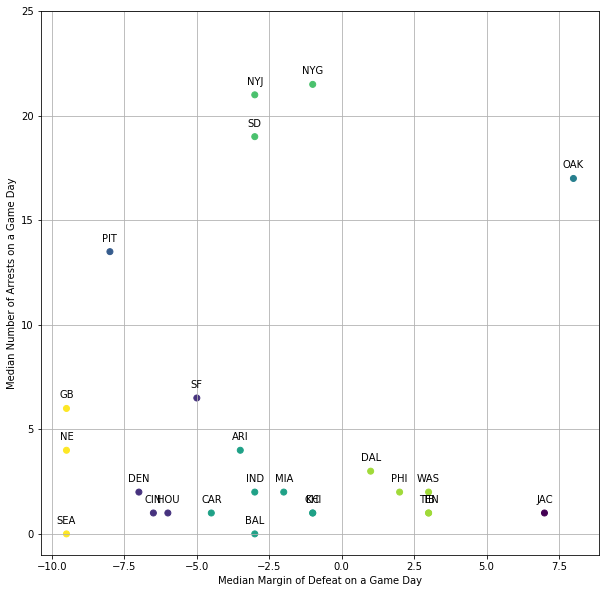

In [18]:
# Plot k-means clustering results

plt.figure(figsize = (10, 10))
plt.scatter(X['marginDefeat'], X['arrests'], c = [-number for number in model.labels_.astype(np.float)])
#plt.flag()
plt.xlabel('Median Margin of Defeat on a Game Day')
plt.ylabel('Median Number of Arrests on a Game Day')
plt.ylim([-1, 25])
plt.grid()

# Labels for each NFL team

for team in range(len(totalarrestsByStadium.index)): # for each NFL team
    
    plt.annotate(totalarrestsByStadium.index[team], (X['marginDefeat'][team], X['arrests'][team]), textcoords = "offset points",\
                 xytext = (0, 10), ha = 'center')
plt.show()

In [19]:
inertia = model.inertia_
print("Model Inertia: " + str(round(inertia, 3)))

Model Inertia: 1.987


In [20]:
centroids = scaler.inverse_transform(model.cluster_centers_)
print('CLUSTER CENTER COORDINATES: \n\n')
for center in range(8):
    print('Cluster Centroid #' + str(center + 1) + ': ' + str(centroids[center]) + '\n')

CLUSTER CENTER COORDINATES: 


Cluster Centroid #1: [-9.5         3.33333333]

Cluster Centroid #2: [2.4 1.8]

Cluster Centroid #3: [-2.33333333 20.5       ]

Cluster Centroid #4: [-2.57142857  1.57142857]

Cluster Centroid #5: [ 8. 17.]

Cluster Centroid #6: [-8.  13.5]

Cluster Centroid #7: [-6.125  2.625]

Cluster Centroid #8: [7. 1.]



It was determined that eight clusters captured the most informative groupings of NFL teams. The simulation converged with a model inertia of 1.926. 

The most apparent observations are the five NFL teams whose median numbers of arrests are convincingly higher than those of the remaining twenty teams. The New York Giants, New York Jets, and San Diego Chargers were assigned to a single cluster with a centroid of 20.5 arrests per game and a -2.33 margin of defeat. This result suggests that these three teams managed to win mostly competitive home games and frequently reported many arrests at the stadiums. 

On the other hand, the Oakland Raiders and the Pittsburgh Steelers were assigned to their own clusters. Both of the teams reported large numbers of arrests, but their teams’ performances during these regular seasons are polar opposites. The Oakland Raiders lost by at least one touchdown for the majority of it home games, while the Pittsburgh Steelers defeated their opponents by at least one touchdown. 

The remaining twenty teams were grouped into five clusters. The Jacksonville Jaguars were assigned to its own cluster with a centroid of one arrest per game and a 7.0 margin of defeat. This finding is indicative of a franchise that performed poorly at their home venue (i.e. lost games by more than a touchdown) and recorded some of the lowest attendance figures among all NFL stadiums. With few fans in attendance and many convincing defeats, the chances of observing an arrest are very likely to decrease substantially. 

The Dallas Cowboys, Philadelphia Eagles, Tampa Bay Buccaneers, Tennessee Titans, and Washington Redskins were assigned to the same cluster centered at 1.8 arrests per game and a 2.4 margin of defeat. In contrast to the Jaguars, these five teams appeared to be competitive in their home games and lost by small margins. Furthermore, they reported almost one more arrest per game than the Jaguars did. 

The Arizona Cardinals, Baltimore Ravens, Chicago Bears, Indianapolis Colts, Kansas City Chiefs, and Miami Dolphins were assigned to a cluster with a centroid of 1.67 arrests per game and a -2.25 margin of defeat. These six teams played many competitive home games and barely managed to win. They also reported a similar number of arrests to the five aforementioned teams that lost numerous close home games. 

The Carolina Panthers, Cincinnati Bengals, Denver Broncos, Houston Texans, and San Francisco 49ers were assigned to a cluster whose centroid coordinate is 2.3 arrests per game and a -5.8 margin of defeat. These five teams defeated most of their opponents at home by slightly less than a touchdown, and they also reported slightly more arrests per game than both the Jacksonville Jaguars and the NFL teams involved in close games. 

Lastly, the Green Bay Packers, New England Patriots, and Seattle Seahawks were grouped into the final cluster. The centroid of this cluster is 3.33 arrests per game and a -9.5 margin of defeat. These three teams appear most suited to epitomize the term “home-field advantage”. They convincingly defeated many of their opponents at their home stadiums, and there appeared to be one more reported arrest per game than the five previously discussed teams.   

Upon analysis of the remaining twenty teams, it appears that the variation in the median number of arrests increases as the median margin of defeat at home games decreases. In other words, the likelihood of observing more arrests at a stadium appears to increase when the home team outscores their opponent by a greater margin. Despite the staggering median numbers of arrests reported by five NFL teams, these values are most likely anomalies.

## IDENTIFYING CORRELATIONS BETWEEN GAME FEATURES AND ARREST DATA

By virtue of k-means clustering, a potential relationship between a game feature (i.e. the home team’s margin of defeat) and the number of observed arrests was suggested. However, the dataset contains nine total features.

On the other hand, nine features are possibly extraneous in predicting the number of arrests. Thus, dimensionality reduction was applied to the nine original features in order to select the most important ones and compute the percentages of the total variance that are captured. Factor analysis of mixed data (FAMD) is a dimensionality reduction tool that is applicable to datasets containing both quantitative and categorical features. This hybridized method simultaneously conducts a principal components analysis (PCA) on the quantitative features and multiple correspondence analysis (MCA) on the categorical features of the training set.

Before implementing FAMD, the quantitative features were scaled to unit variance. Similarly, the categorical variables were organized into a disjunctive data table and also scaled such that each observation’s categorical assignments were represented as the deviations from having independent categorical features. This preprocessing step ensures that both types of features are weighted equally when determining the factors. 

In contrast to principal components, these factors are latent (unobserved) variables that also capture the variance of the original dataset using a potentially lower dimensional feature space. The observed (or original) features are linear combinations of these hidden variables.

*NOTE: The game and arrest data for the five outlier NFL teams (New York Giants, New York Jets, San Diego Chargers, Oakland Raiders, Pittsburgh Steelers) were omitted from the FAMD.*

In [23]:
from datetime import datetime

# MODIFY DATAFRAME for Factor Analysis of Mixed Data (FAMD)

df.OT_flag = ['OT' if flag == 'OT' else 'RG' for flag in df.OT_flag]
df.gametime_local = [datetime.strptime(time, '%I:%M:%S %p') for time in df.gametime_local]
df.gametime_local = [((time.hour - 12) + time.minute/60) for time in df.gametime_local] # TIME = HOURS AFTER 12:00PM LOCAL
df.head(50)

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
0,2011,1,Sunday,1.250000,Arizona,Carolina,28,21,RG,5.0,n
1,2011,4,Sunday,1.083333,Arizona,New York Giants,27,31,RG,6.0,n
2,2011,7,Sunday,1.083333,Arizona,Pittsburgh,20,32,RG,9.0,n
3,2011,9,Sunday,2.250000,Arizona,St. Louis,19,13,OT,6.0,y
4,2011,13,Sunday,2.250000,Arizona,Dallas,19,13,OT,3.0,n
5,2011,14,Sunday,2.083333,Arizona,San Francisco,21,19,RG,4.0,y
6,2011,15,Sunday,2.250000,Arizona,Cleveland,20,17,OT,1.0,n
7,2011,17,Sunday,2.250000,Arizona,Seattle,23,20,OT,4.0,y
8,2012,1,Sunday,1.416667,Arizona,Seattle,20,16,RG,0.0,y
9,2012,3,Sunday,1.083333,Arizona,Philadelphia,27,6,RG,12.0,n


In [24]:
from light_famd import FAMD

X = df.drop(['arrests'], axis = 1)
X = X.drop(index = X.index[X['home_team'].isin(['New York Giants', 'New York Jets', 'San Diego', 'Pittsburgh', 'Oakland'])])

famd = FAMD(n_components = 3)
famd.fit(X)

MCA PROCESS ELIMINATED 0  COLUMNS SINCE THEIR MISS_RATES >= 99%


FAMD(check_input=True, copy=False, engine='auto', n_components=3, n_iter=2,
   random_state=None)

In [25]:
X.shape

(769, 10)

In [26]:
famd.explained_variance_

array([6122.68037758, 1231.01527887,  414.53420373])

In [27]:
famd.explained_variance_ratio_

[0.4604883106029131, 0.09258496461275947, 0.031177220333468335]

In [34]:
df_old = df
correlations = df
famd.column_correlation(correlations).dropna(axis = 0, how = 'all')

,0,1,2
OT_flag_OT,-0.529266,NaN,-0.408621
OT_flag_RG,0.529266,NaN,0.408621
away_team_Arizona,NaN,NaN,-0.064613
away_team_Atlanta,0.066568,NaN,NaN
away_team_Chicago,NaN,NaN,0.113041
away_team_Green Bay,0.067908,-0.073801,NaN
away_team_Jacksonville,NaN,NaN,-0.097478
away_team_New York Giants,NaN,NaN,0.072748
away_team_Pittsburgh,NaN,NaN,0.086840
away_team_St. Louis,NaN,NaN,-0.066666


It was determined that approximately 60% of the total variance could be represented by three latent factors.

The first factor represents roughly 46.1% of the total variance. It is highly correlated with multiple categorical game features, such as the day of the week that the game was played, the local game time, and whether the game concluded in overtime.

In contrast, the second factor accounts for 9.3% of the total variance; however, it is predominantly correlated with one categorical feature: whether the game was played between two teams in the same division. While the first factor recaptures the bulk of the original dataset’s variance, the second factor primarily determines if a game was played between two rivals.

Lastly, the third factor represents only 3.1 % of the total variance. It is correlated with the local game time and the day of the week that the game was played. 

Interestingly, the FAMD determined that neither the identities nor the scores of both the home and away teams are correlated with the computed factors. In fact, the local game time and week number were the only two quantitative variables that exhibited some correlation with the latent factors, but both of these features’ correlations were generally lower than those of the categorical features. 

Therefore, the FAMD results suggested that game features that measure the game’s level of competitiveness were the most meaningful variables of the original dataset (e.g. whether the game was a divisional matchup, needed to conclude in overtime, whether the game was played early or later in the regular season, whether the game was a prime-time game on Sunday, Monday, Thursday, or Saturday evening). 

This conclusion parallels the observed trend from the k-means clustering simulations; teams that generally perform competitively in their home stadiums exhibit greater variations in the number of reported stadium arrests than teams that are generally not competitive at their home stadium.